### Detecting Credit Card Approval
**Goal/ Question:** 
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk. The goal of this project is to predict the likelihood of an applicant getting credit card approval.

**Data Problem:** The data task is to train and tune data to be identify key dimensions that help build a highly accurate model that predicts the credit score and hence credit card approval rate. This will enable the credit companies to identify the risky applicants from non-risky applicants.

**Data**

The data is sourced from Kaggle.


Link: 
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data?select=application_record.csv
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data?select=credit_record.csv


### Understanding the Data

#### Import and Setup

In [108]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from scipy.stats import randint

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, average_precision_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from joblib import parallel_backend


from sklearn.decomposition import PCA

from warnings import filterwarnings 

from datetime import datetime
import time

from sklearn.dummy import DummyClassifier



In [110]:
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

In [112]:
df_application = pd.read_csv('data/application_record.csv')

In [114]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [116]:
df_application.head(10)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   
5  5008810           F            N               Y             0   
6  5008811           F            N               Y             0   
7  5008812           F            N               Y             0   
8  5008813           F            N               Y             0   
9  5008814           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   
5          270000.0  Commercial associate  Secondary / secondary special   
6          270000.0  Commercial associate  Secondary / secondary special   
7          283500.0             Pensioner               Higher education   
8          283500.0             Pensioner               Higher education   
9          283500.0             Pensioner               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   
5  Single / not married  House / apartment      -19110          -3051   
6  Single / not married  House / apartment      -19110          -3051   
7             Separated  House / apartment      -22464         365243   
8             Separated  House / apartment      -22464         365243   
9             Separated  House / apartment      -22464         365243   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   
5           1                0           1           1     Sales staff   
6           1                0           1           1     Sales staff   
7           1                0           0           0             NaN   
8           1                0           0           0             NaN   
9           1                0           0           0             NaN   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0  
5              1.0  
6              1.0  
7              1.0  
8              1.0  
9              1.0

In [118]:
df_application.shape

(438557, 18)

In [120]:
df_credit = pd.read_csv('data/credit_record.csv')

In [122]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [124]:
df_credit.shape

(1048575, 3)

In [126]:
df_credit.head(5)

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [128]:
df = pd.merge(df_application, df_credit, on='ID', how='inner')

### Understanding the Features and Target variable
#### Checking data type of features and looking for null values

| Feature name | Explanation Remarks |
| ----------- | ----------- |
| ID      | Client number       |
| CODE_GENDER   | Gender        |
| FLAG_OWN_CAR       | Is there a car       |
| FLAG_OWN_REALTY    | Is there a property  |
| CNT_CHILDREN       | Number of children   |
| AMT_INCOME_TOTAL   | Annual income        |
| AME_INCOME_TYPE    | Income category      |
| NAME_EDUCATION_TYPE| Education level      |
| NAME_FAMILY_STATUS | Marital status       |
| NAME_HOUSING_TYPE  | Way of living        |
| FLAG_MOBIL         | Is there a mobile phone |
| FLAG_WORK_PHONE    | Is there a work phone   |
| FLAG_PHONE         | Is there a phone        |
| FLAG_EMAIL         | Is there an email       |
|DAYS_BIRTH          |Birthday	Count backwards from current day (0), -1 means yesterday|
|DAYS_EMPLOYED |Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.|
|OCCUPATION_TYPE | Occupation	|
|CNT_FAM_MEMBERS  |	Family size |

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [132]:
print(df.isnull().sum().sort_values())
print()
print('Shape: ',df.shape)

ID                          0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
MONTHS_BALANCE              0
NAME_HOUSING_TYPE           0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
CODE_GENDER                 0
NAME_FAMILY_STATUS          0
STATUS                      0
OCCUPATION_TYPE        240048
dtype: int64

Shape:  (777715, 20)


In [134]:
columns_with_null = df.columns[df.isnull().any()].tolist()


# Identify columns where 'unknown' is present
columns_with_unknown = [col for col in df.columns if df[col].astype(str).eq('unknown').any()]

print("Rows with null values:",columns_with_null)
print()
print("Rows with unknown values:",columns_with_unknown)
print()
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print("Rows with non-numeric values:",non_numeric_columns)

Rows with null values: ['OCCUPATION_TYPE']

Rows with unknown values: []

Rows with non-numeric values: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'STATUS']


### There are null values but no unknown values

In [136]:
columns_to_drop = ['ID','OCCUPATION_TYPE']

# Drop the columns in one shot
df.drop(columns=columns_to_drop, inplace=True)

In [138]:
df = df.dropna()
df.shape

(777715, 18)

In [140]:
df['CODE_GENDER'].unique()
print("Value Counts:",df['CODE_GENDER'].value_counts())

df['FLAG_MOBIL'].unique()
print("Value Counts:",df['FLAG_MOBIL'].value_counts())

df['FLAG_OWN_CAR'].unique()
print("Value Counts:",df['FLAG_OWN_REALTY'].value_counts())

df['CNT_CHILDREN'].unique()
print("Value Counts:",df['CNT_CHILDREN'].value_counts())

Value Counts: CODE_GENDER
F    518851
M    258864
Name: count, dtype: int64
Value Counts: FLAG_MOBIL
1    777715
Name: count, dtype: int64
Value Counts: FLAG_OWN_REALTY
Y    512948
N    264767
Name: count, dtype: int64
Value Counts: CNT_CHILDREN
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: count, dtype: int64


In [142]:
children = {
    (0, 1): 'No Children',
    (1, 40): 'Have Children'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in children.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['CHILDREN'] = df['CNT_CHILDREN'].apply(map_to_range)

#columns_to_drop = ['CNT_CHILDREN']

# Drop the columns in one shot
#df.drop(columns=columns_to_drop, inplace=True)

df['CHILDREN'].unique()
print("Value Counts:",df['CHILDREN'].value_counts())

df['AMT_INCOME_TOTAL'].unique()
print("Min:",df['AMT_INCOME_TOTAL'].min())
print("Max:",df['AMT_INCOME_TOTAL'].max())

income = {
    (20000, 100000): '<100K',
    (100000, 150000): '100K - 150K',    
    (150000, 200000): '150K - 200K',
    (200000, 250000): '200K - 250K',
    (250000, 300000): '250K - 300K',
    (300000, 2000000): '>300K'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in income.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['income_range'] = df['AMT_INCOME_TOTAL'].apply(map_to_range)

#columns_to_drop = ['AMT_INCOME_TOTAL']

# Drop the columns in one shot
#df.drop(columns=columns_to_drop, inplace=True)

df['MONTHS_BALANCE'].unique()
print("Min:",df['MONTHS_BALANCE'].min())
print("Max:",df['MONTHS_BALANCE'].max())

income = {
    (-70, -50): '>50 months',
    (-50, -40): '40-50 months',    
    (-40, -30): '30-40 months',
    (-30, -20): '20-30 months',
    (-20, -10): '10-20 months',
    (-10, -8): '8-10 months',
    (-8, -7): '8 months',
    (-7, -6): '7 months',        
    (-6, -5): '6 months',    
    (-5, -4): '5 months',
    (-4, -3): '4 months',
    (-3, -2): '3 months',
    (-2, -1): '2 months',
    (-1, 0): '1 month',
    (0, 1): '0 months'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in income.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['month_balance_range'] = df['MONTHS_BALANCE'].apply(map_to_range)
print(df['month_balance_range'].value_counts())


columns_to_drop = ['MONTHS_BALANCE']
# Drop the columns in one shot
df.drop(columns=columns_to_drop, inplace=True)

df['CNT_FAM_MEMBERS'].unique()
print("Value Counts:",df['CNT_FAM_MEMBERS'].value_counts())

family = {
    (1, 2): '1',
    (2, 3): '2',    
    (3, 30): '3 Plus'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in family.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].apply(map_to_range)

#columns_to_drop = ['CNT_FAM_MEMBERS']

# Drop the columns in one shot
#df.drop(columns=columns_to_drop, inplace=True)

print()
print(df['FAM_MEMBERS'].value_counts())


# C: paid off that month 
# X: No loan for the month
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 

df['loan_status'] = df['STATUS'].map({'0': 'first_month_due' , '1': '2nd_month_due', '2' : '3rd_month_overdue',  '3': '4th_month_overdue',
                                '4' : '5th_month_overdue', '5' : 'bad_debt' , 'C': 'good' , 'X' : 'no_loan'})

df['STATUS'].replace("C" , "Good_Debt" , inplace = True)
df['STATUS'].replace("X" , "Good_Debt" , inplace = True)
df['STATUS'].replace("0" , "Good_Debt" , inplace = True)
df['STATUS'].replace("1" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("2" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("3" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("4" , "Bad_Debt" , inplace = True)
df['STATUS'].replace("5" , "Bad_Debt" , inplace = True)

print()
print("Value Counts:",df['STATUS'].value_counts())


Value Counts: CHILDREN
No Children      540639
Have Children    237076
Name: count, dtype: int64
Min: 27000.0
Max: 1575000.0
Min: -60
Max: 0
month_balance_range
10-20 months    192903
20-30 months    147168
30-40 months    102143
40-50 months     57199
8-10 months      43815
1 month          24963
2 months         24871
0 months         24672
3 months         24644
4 months         24274
5 months         23899
6 months         23473
7 months         23018
8 months         22494
>50 months       18179
Name: count, dtype: int64
Value Counts: CNT_FAM_MEMBERS
2.0     423723
1.0     141477
3.0     134894
4.0      66990
5.0       8999
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: count, dtype: int64

FAM_MEMBERS
2         423723
3 Plus    212515
1         141477
Name: count, dtype: int64


C:\Users\rames\AppData\Local\Temp\ipykernel_3544\617246188.py:126: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATUS'].replace("C" , "Good_Debt" , inplace = True)
C:\Users\rames\AppData\Local\Temp\ipykernel_3544\617246188.py:127: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Value Counts: STATUS
Good_Debt    766140
Bad_Debt      11575
Name: count, dtype: int64


C:\Users\rames\AppData\Local\Temp\ipykernel_3544\617246188.py:132: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATUS'].replace("4" , "Bad_Debt" , inplace = True)
C:\Users\rames\AppData\Local\Temp\ipykernel_3544\617246188.py:133: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [144]:
df['DAYS_BIRTH'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + df['DAYS_BIRTH'].apply(pd.offsets.Day)
df['DAYS_BIRTH'] = pd.to_datetime(df['DAYS_BIRTH'])
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].dt.year
current_year = datetime.now().year
df['AGE'] = current_year - df['DAYS_BIRTH']
df.drop(columns='DAYS_BIRTH', inplace=True)

In [145]:
def convert_to_working_years(days_employed):
    if days_employed < 0:
        return -1 * (days_employed // 365)
    else:
        return 0

# Apply the function to the DAYS_EMPLOYED column
df['WORKING_YEARS'] = df['DAYS_EMPLOYED'].apply(convert_to_working_years)


df.drop(columns='DAYS_EMPLOYED', inplace=True)

In [146]:
df.shape

(777715, 22)

## Visualizing Features and Target variable

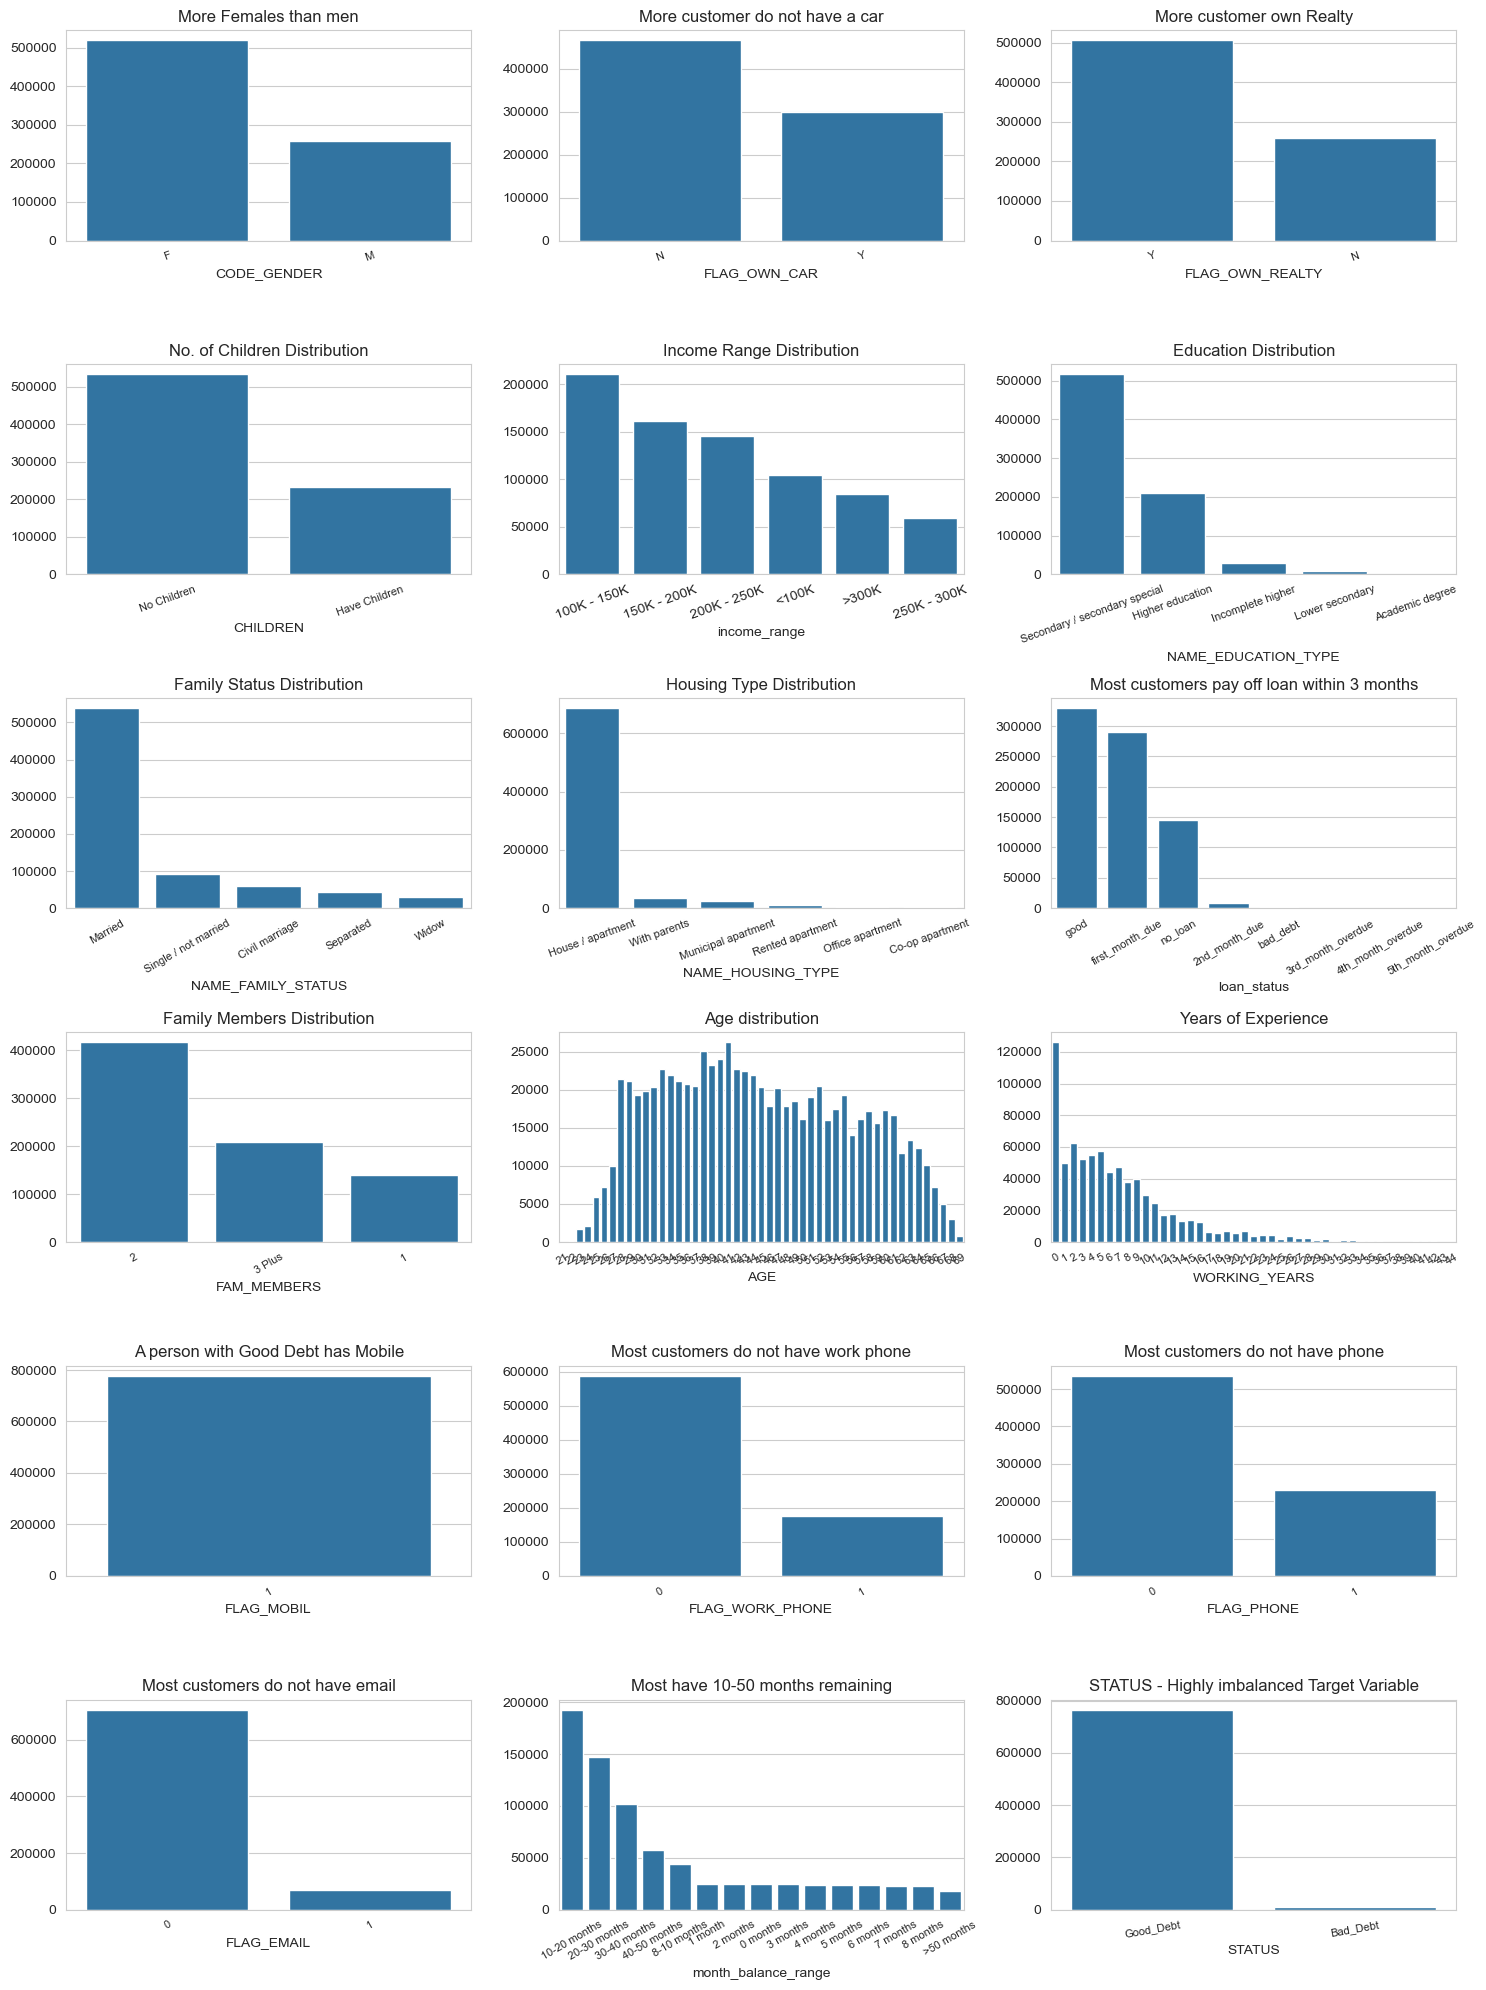

In [150]:
sns.set_style("whitegrid")

# Create subplots
#fig, axes = plt.subplots(9, 2, figsize=(10, 30))
fig, axes = plt.subplots(6, 3, figsize=(15, 20))


df1 = df.loc[(df['STATUS'] == 'Good_Debt')]


# Plot for 'Gender' column
value_counts = df['CODE_GENDER'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values,ax=axes[0, 0])
axes[0, 0].set_title('More Females than men')
axes[0, 0].tick_params(axis='x', labelrotation=20,labelsize=8)

# Plot for 'Own Car' column
value_counts = df1['FLAG_OWN_CAR'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('More customer do not have a car')
axes[0, 1].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'Own Realty' column
value_counts = df1['FLAG_OWN_REALTY'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 2])
axes[0, 2].set_title('More customer own Realty')
axes[0, 2].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'No. of Children Distribution' column
value_counts = df1['CHILDREN'].value_counts()
#sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 0])
sns.countplot(data=df, x=df['loan_status'], hue=df['CHILDREN'],ax=axes[1, 0])
axes[1, 0].set_title('More customers with no children')
axes[1, 0].tick_params(axis='x', labelrotation=20,labelsize=8)
#for index, value in enumerate(value_counts.values):
#    axes[1, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')
   
# Plot for 'Income range' column
value_counts = df1['income_range'].value_counts()
#sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 1])
sns.countplot(data=df, x=df['loan_status'], hue=df['income_range'],ax=axes[1, 1])
axes[1, 1].set_title('People with 100-150K have better loan statuses')
axes[1, 1].tick_params(axis='x', labelrotation=20)
   
# Plot for 'Income Type' column
value_counts = df1['NAME_EDUCATION_TYPE'].value_counts()
highest_values = value_counts.nlargest(8)
#sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[1, 2])
sns.countplot(data=df, x=df['loan_status'], hue=df['NAME_EDUCATION_TYPE'],ax=axes[1, 2])
axes[1, 2].set_title('Education Distribution')
axes[1, 2].tick_params(axis='x', labelrotation=20,labelsize=8)
   
# Plot for 'Education' column
value_counts = df1['NAME_FAMILY_STATUS'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 0])
axes[2, 0].set_title('Family Status Distribution')
axes[2, 0].tick_params(axis='x', labelrotation=30,labelsize=8)
   
   
# Plot for 'Family status' column
value_counts = df1['NAME_HOUSING_TYPE'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 1])
axes[2, 1].set_title('Housing Type Distribution')
axes[2, 1].tick_params(axis='x', labelrotation=20,labelsize=8)

# Plot for 'Loan Status' column
value_counts = df['loan_status'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 2])
axes[2, 2].set_title('Most customers pay off loan within 3 months')
axes[2, 2].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'Family Members' column
value_counts = df1['FAM_MEMBERS'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[3, 0])
axes[3, 0].set_title('Family Members Distribution')
axes[3, 0].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'Age' column
value_counts = df1['AGE'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[3, 1])
axes[3, 1].set_title('Age distribution')
axes[3, 1].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'Years of Experience' column
value_counts = df1['WORKING_YEARS'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[3, 2])
axes[3, 2].set_title('Years of Experience')
axes[3, 2].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'FLAG_MOBIL' column
value_counts = df['FLAG_MOBIL'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[4, 0])
axes[4, 0].set_title('A person with Good Debt has Mobile')
axes[4, 0].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'FLAG_WORK_PHONE' column
value_counts = df1['FLAG_WORK_PHONE'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[4, 1])
axes[4, 1].set_title('Most customers do not have work phone')
axes[4, 1].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'FLAG_PHONE' column
value_counts = df1['FLAG_PHONE'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[4, 2])
axes[4, 2].set_title('Most customers do not have phone')
axes[4, 2].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'FLAG_EMAIL' column
value_counts = df['FLAG_EMAIL'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[5, 0])
axes[5, 0].set_title('Most customers do not have email')
axes[5, 0].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for '' column
value_counts = df['month_balance_range'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[5, 1])
axes[5, 1].set_title('Most have 10-50 months remaining')
axes[5, 1].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'STATUS' column
value_counts = df['STATUS'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[5, 2])
axes[5, 2].set_title('STATUS - Highly imbalanced Target Variable')
axes[5, 2].tick_params(axis='x', labelrotation=30,labelsize=8)

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)
plt.xticks(fontsize=8)


# Show the plots
plt.show()

## Data Pre-processing and Data Clean up

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  object 
 1   FLAG_OWN_CAR         777715 non-null  object 
 2   FLAG_OWN_REALTY      777715 non-null  object 
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  object 
 6   NAME_EDUCATION_TYPE  777715 non-null  object 
 7   NAME_FAMILY_STATUS   777715 non-null  object 
 8   NAME_HOUSING_TYPE    777715 non-null  object 
 9   FLAG_MOBIL           777715 non-null  int64  
 10  FLAG_WORK_PHONE      777715 non-null  int64  
 11  FLAG_PHONE           777715 non-null  int64  
 12  FLAG_EMAIL           777715 non-null  int64  
 13  CNT_FAM_MEMBERS      777715 non-null  float64
 14  STATUS               777715 non-null  object 
 15  CHILDREN         

In [154]:
df_backup = df.copy()

In [156]:
# Columns to binarize
columns_to_binarize = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CHILDREN','STATUS']

label_encoders = {}

# Iterate over columns and perform label encoding
for col in columns_to_binarize:
    label_encoders[col] = LabelBinarizer()
    df_backup[col] = label_encoders[col].fit_transform(df_backup[col])

In [157]:
# Identify non-numeric columns
non_numeric_columns = df_backup.select_dtypes(exclude=['number']).columns

# Exclude one column to keep as it is
column_to_keep = 'loan_status'  # Replace with the column name you want to keep as it is
non_numeric_columns = non_numeric_columns[non_numeric_columns != column_to_keep]

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to non-numeric columns
for column in non_numeric_columns:
    df_backup[column] = le.fit_transform(df_backup[column])

In [160]:
df_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  int32  
 1   FLAG_OWN_CAR         777715 non-null  int32  
 2   FLAG_OWN_REALTY      777715 non-null  int32  
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  int32  
 6   NAME_EDUCATION_TYPE  777715 non-null  int32  
 7   NAME_FAMILY_STATUS   777715 non-null  int32  
 8   NAME_HOUSING_TYPE    777715 non-null  int32  
 9   FLAG_MOBIL           777715 non-null  int64  
 10  FLAG_WORK_PHONE      777715 non-null  int64  
 11  FLAG_PHONE           777715 non-null  int64  
 12  FLAG_EMAIL           777715 non-null  int64  
 13  CNT_FAM_MEMBERS      777715 non-null  float64
 14  STATUS               777715 non-null  int32  
 15  CHILDREN         

In [162]:
# Drop 'loan_status' and 'status' columns from col
col = df_backup.drop(['loan_status', 'STATUS'], axis=1) # Assume that col is our independent variable

# Compute variance inflation factor

# Create a dataframe to store the VIF
factor  = pd.DataFrame(columns=["VIF", "Features"] )
# For each column, compute the VIF
factor["Features"] = col.columns
factor["VIF"] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]

# Display the results
factor

VIF             Features
0     1.246295          CODE_GENDER
1     1.221541         FLAG_OWN_CAR
2     1.092500      FLAG_OWN_REALTY
3   106.730594         CNT_CHILDREN
4     1.496176     AMT_INCOME_TOTAL
5     1.126678     NAME_INCOME_TYPE
6     1.109896  NAME_EDUCATION_TYPE
7     4.996593   NAME_FAMILY_STATUS
8     1.073202    NAME_HOUSING_TYPE
9   203.889787           FLAG_MOBIL
10    1.228819      FLAG_WORK_PHONE
11    1.124337           FLAG_PHONE
12    1.030392           FLAG_EMAIL
13  164.762327      CNT_FAM_MEMBERS
14   42.000591             CHILDREN
15    1.332842         income_range
16    1.000197  month_balance_range
17   86.917049          FAM_MEMBERS
18    1.438173                  AGE
19    1.071087        WORKING_YEARS

Multicollinearity occurs when two or more predictor variables in the model are highly correlated.

Variance Inflation Factor (VIF) is 1.0 for all columns except children, family_status and mobile which are highly correlated with each other.

Hence, we need to drop children , family_status & mobile columns from our independent variable list to get best results.

In [163]:
columns_to_drop = ['CNT_FAM_MEMBERS','CNT_CHILDREN','FLAG_MOBIL','NAME_FAMILY_STATUS','CHILDREN','FAM_MEMBERS','loan_status']

# Drop the columns in one shot
df.drop(columns=columns_to_drop, inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  object 
 1   FLAG_OWN_CAR         777715 non-null  object 
 2   FLAG_OWN_REALTY      777715 non-null  object 
 3   AMT_INCOME_TOTAL     777715 non-null  float64
 4   NAME_INCOME_TYPE     777715 non-null  object 
 5   NAME_EDUCATION_TYPE  777715 non-null  object 
 6   NAME_HOUSING_TYPE    777715 non-null  object 
 7   FLAG_WORK_PHONE      777715 non-null  int64  
 8   FLAG_PHONE           777715 non-null  int64  
 9   FLAG_EMAIL           777715 non-null  int64  
 10  STATUS               777715 non-null  object 
 11  income_range         777715 non-null  object 
 12  month_balance_range  777715 non-null  object 
 13  AGE                  777715 non-null  int32  
 14  WORKING_YEARS        777715 non-null  int64  
dtypes: float64(1), in

In [165]:
# Columns to binarize
columns_to_binarize = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','STATUS']

label_encoders = {}

# Iterate over columns and perform label encoding
for col in columns_to_binarize:
    label_encoders[col] = LabelBinarizer()
    df[col] = label_encoders[col].fit_transform(df[col])

In [166]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Exclude one column to keep as it is
column_to_keep = 'loan_status'  # Replace with the column name you want to keep as it is
non_numeric_columns = non_numeric_columns[non_numeric_columns != column_to_keep]

# Apply one-hot encoding to remaining non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_columns,  dtype=int)

## Feature selection

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 47 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   CODE_GENDER                                        777715 non-null  int32  
 1   FLAG_OWN_CAR                                       777715 non-null  int32  
 2   FLAG_OWN_REALTY                                    777715 non-null  int32  
 3   AMT_INCOME_TOTAL                                   777715 non-null  float64
 4   FLAG_WORK_PHONE                                    777715 non-null  int64  
 5   FLAG_PHONE                                         777715 non-null  int64  
 6   FLAG_EMAIL                                         777715 non-null  int64  
 7   STATUS                                             777715 non-null  int32  
 8   AGE                                                777715 non-null  int32 

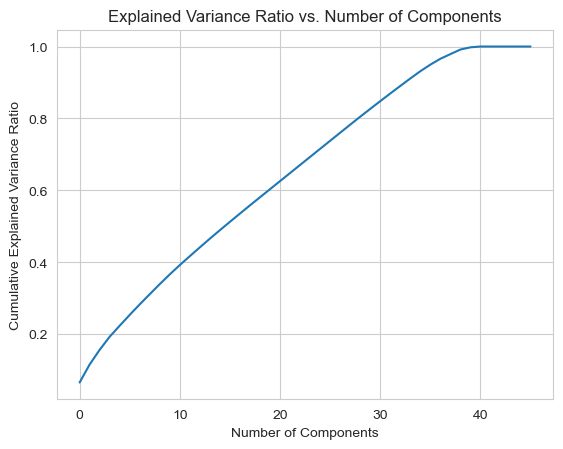

In [67]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)  # Fit PCA on your data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

#### Principal Component Analysis shows 35 features show 95% of cumulative explained variance

## Arriving at hyper parameters for Classifiers
### Using subset of data to arrive at hypertuned parameters before true comparison


In [174]:
df_answer = pd.DataFrame(columns=['Method', 'Parameters', 'Train Time', 'Train Accuracy','Test Accuracy','ROC_AUC','Average Precision'])
pd.set_option('display.max_colwidth', 100)  # Adjust the width as needed

### Logistic Regression

In [176]:
df_reduced = df.sample(frac=0.1, random_state=42)

X = df_reduced.drop('STATUS', axis=1)  # Drop the target column to get features
y = df_reduced['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('logistic', LogisticRegression(max_iter=10000))  # Step 3: Logistic with specified parameters
])

# Define parameter grid for Logistic Regression
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1],
    'logistic__solver': ['liblinear', 'lbfgs','saga']
}


# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

from joblib import parallel_backend

grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

# Print the best parameters and best score
print('\033[1m' +'Logistic Regression'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")

Logistic Regression

Best parameters found:  {'logistic__C': 0.001, 'logistic__solver': 'saga'}
Best cross-validation accuracy: 0.543





In [177]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('logistic', LogisticRegression(max_iter=10000, C=0.001,solver='saga'))  # Step 3: Logistic with specified parameters
])


start_time = time.time()
pipeline.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
model_probabilities = pipeline.predict_proba(X_test)[:, 1]
model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)


# Print the best parameters and best score
print('\033[1m' +'Logistic Regression'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")
print(f"Training time: {training_time}")
print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"ROC_AUC: {model_roc_auc:.3f}")
print(f"Average precision: {model_avg_precision:.3f}")

Logistic Regression

Best parameters found:  {'logistic__C': 0.001, 'logistic__solver': 'saga'}
Best cross-validation accuracy: 0.543



Training time: 10.872239589691162
Train set accuracy: 0.985
Test set accuracy: 0.985
ROC_AUC: 0.573
Average precision: 0.988


In [178]:
next_index = len(df_answer)
df_answer.loc[next_index] = ['Logistic', str(grid_search.best_params_), training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]

### Decision Tree

In [179]:
df_reduced = df.sample(frac=0.1, random_state=42)

X = df_reduced.drop('STATUS', axis=1)  # Drop the target column to get features
y = df_reduced['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('dt', DecisionTreeClassifier(random_state=4))  # Step 3: Logistic with specified parameters
])

# Define parameter grid for DecisionTree Regression
param_grid = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 10, 20, 30]
}

cv = StratifiedKFold(n_splits=5)


# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

with parallel_backend('threading', n_jobs=4):
    grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

# Print the best parameters and best score
print('\033[1m' +'DecisionTree'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")

DecisionTree

Best parameters found:  {'dt__criterion': 'entropy', 'dt__max_depth': None}
Best cross-validation accuracy: 0.561





In [180]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=None,random_state=4))  # Step 3: Logistic with specified parameters
])

start_time = time.time()
with parallel_backend('threading', n_jobs=-1):
    pipeline.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
model_probabilities = pipeline.predict_proba(X_test)[:, 1]
model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)


# Print the best parameters and best score
print('\033[1m' +'DecisionTree Classifier'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")
print(f"Training time: {training_time}")
print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"ROC_AUC: {model_roc_auc:.3f}")
print(f"Average precision: {model_avg_precision:.3f}")

DecisionTree Classifier

Best parameters found:  {'dt__criterion': 'entropy', 'dt__max_depth': None}
Best cross-validation accuracy: 0.561



Training time: 34.973753690719604
Train set accuracy: 0.987
Test set accuracy: 0.983
ROC_AUC: 0.772
Average precision: 0.993


In [181]:
next_index = len(df_answer)
df_answer.loc[next_index] = ['DecisionTree',str(grid_search.best_params_), training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]

### KNeighbors Classifier

In [182]:
df_reduced = df.sample(frac=0.05, random_state=42)

X = df_reduced.drop('STATUS', axis=1)  # Drop the target column to get features
y = df_reduced['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline Setup
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=35)),
    ('knn', KNeighborsClassifier())
])

In [183]:
# GridSearchCV Setup
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

#  Fit the model
with parallel_backend('threading', n_jobs=4):
    grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print('\033[1m' +'KNearestNeighbors'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")

KNearestNeighbors

Best parameters found:  {'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best cross-validation accuracy: 0.537





In [184]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('rf', KNeighborsClassifier(n_neighbors=7, weights='distance'))  # Step 3: Random Forest with specified parameters
])

start_time = time.time()
with parallel_backend('threading', n_jobs=-1):
    pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time  

train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
model_probabilities = pipeline.predict_proba(X_test)[:, 1]
model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)


# Print the best parameters and best score
print('\033[1m' +'KNearestNeighbors Classifiers'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")
print(f"Training time: {training_time}")
print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"ROC_AUC: {model_roc_auc:.3f}")
print(f"Average precision: {model_avg_precision:.3f}")

KNearestNeighbors Classifiers

Best parameters found:  {'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best cross-validation accuracy: 0.537



Training time: 5.494231700897217
Train set accuracy: 0.987
Test set accuracy: 0.984
ROC_AUC: 0.708
Average precision: 0.991


In [185]:
next_index = len(df_answer)
df_answer.loc[next_index] = ['KNNeighbors',str(grid_search.best_params_), training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]

In [186]:
df_reduced = df.sample(frac=0.05, random_state=42)

X = df_reduced.drop('STATUS', axis=1)  # Drop the target column to get features
y = df_reduced['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('svc', SVC(probability=True))  # Step 3: Random Forest with specified parameters
])

# Define parameter grid for SVC
param_grid = {
    'svc__C': [0.01,0.1,1,10],
    'svc__gamma': [0.001,0.01],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

#  Fit the model
with parallel_backend('threading', n_jobs=-1):
    grid_search.fit(X_train, y_train)
    
best_model = grid_search.best_estimator_

# Print the best parameters and best score
print('\033[1m' +'SVC Classifiers'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")

SVC Classifiers

Best parameters found:  {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'poly'}
Best cross-validation accuracy: 0.548





In [187]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('rf', SVC(C=1, gamma=0.001, kernel='poly', probability=True))  # Step 3: SVC with specified parameters
])

start_time = time.time()
with parallel_backend('threading', n_jobs=-1):
    pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time  

train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
model_probabilities = pipeline.predict_proba(X_test)[:, 1]
model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)


# Print the best parameters and best score
print('\033[1m' +'SVC Classifiers'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")
print(f"Training time: {training_time}")
print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"ROC_AUC: {model_roc_auc:.3f}")
print(f"Average precision: {model_avg_precision:.3f}")

SVC Classifiers

Best parameters found:  {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'poly'}
Best cross-validation accuracy: 0.548



Training time: 8747.648250102997
Train set accuracy: 0.985
Test set accuracy: 0.985
ROC_AUC: 0.546
Average precision: 0.987


In [188]:
next_index = len(df_answer)
df_answer.loc[next_index] = ['SVC Classifier',str(grid_search.best_params_), training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]

### Neural Network classifier

In [189]:
df_reduced = df.sample(frac=0.05, random_state=42)

X = df_reduced.drop('STATUS', axis=1)  # Drop the target column to get features
y = df_reduced['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('mlp', MLPClassifier(random_state=42))  # Step 3: Random Forest with specified parameters
])

# Define parameter grid for MLPClassifier
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__activation': ['logistic'],
    'mlp__solver': ['sgd'],
    'mlp__alpha': [0.0001, 0.05],
    'mlp__max_iter': [200],
    'mlp__learning_rate': ['constant', 'adaptive']
}

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=12, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)

# Perform the grid search
with parallel_backend('threading', n_jobs=-1):
    random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

# Print the best parameters and best score
print('\033[1m' +'Neural Network Classifiers'+ '\033[0m')
print()
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))
print("\n\n")

Neural Network Classifiers

Best parameters found:  {'mlp__solver': 'sgd', 'mlp__max_iter': 200, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (50,), 'mlp__alpha': 0.05, 'mlp__activation': 'logistic'}
Best cross-validation accuracy: 0.496





In [190]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('rf', MLPClassifier(solver='sgd', max_iter=200, learning_rate='adaptive', hidden_layer_sizes=(50,), alpha=0.05, activation='logistic'))  # Step 3: Random Forest with specified parameters
])

start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time  

train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
model_probabilities = pipeline.predict_proba(X_test)[:, 1]
model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)


# Print the best parameters and best score
print('\033[1m' +'Neural Network Classifiers'+ '\033[0m')
print("\n\n")
print(f"Training time: {training_time}")
print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"ROC_AUC: {model_roc_auc:.3f}")
print(f"Average precision: {model_avg_precision:.3f}")

Neural Network Classifiers



Training time: 94.7105929851532
Train set accuracy: 0.985
Test set accuracy: 0.985
ROC_AUC: 0.567
Average precision: 0.988


In [191]:
next_index = len(df_answer)
df_answer.loc[next_index] = ['Neural Network Classifier',str(random_search.best_params_), training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]

### Random Forest Classifier

In [192]:
df_reduced = df.sample(frac=0.01, random_state=42)

X = df_reduced.drop('STATUS', axis=1)  # Drop the target column to get features
y = df_reduced['STATUS']  # Assign the target column to y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using PCA
pca = PCA(n_components=35)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [193]:
param_grid = {
    'n_estimators': [50, 100, 150],      # Example: List of discrete values
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1],        # Minimum number of samples required to be at a leaf node
    'bootstrap': [False]            # Whether bootstrap samples are used when building trees
}


# Perform GridSearchCV with parallel processing
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=4)

# Perform the grid search
with parallel_backend('threading', n_jobs=4):
    grid_search.fit(X_train, y_train)

In [194]:
best_model = grid_search.best_estimator_

# Print the best parameters and best score
print('\033[1m' +'Random Forest Classifiers'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")

Random Forest Classifiers

Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best cross-validation accuracy: 0.526





In [195]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the data
    ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
    ('rf', RandomForestClassifier(n_estimators=150, max_depth=None, bootstrap=False, min_samples_leaf=1, min_samples_split=10))  # Step 3: Random Forest with specified parameters
])

start_time = time.time()
with parallel_backend('threading', n_jobs=6):
    pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time  

train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
model_probabilities = pipeline.predict_proba(X_test)[:, 1]
model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)


# Print the best parameters and best score
print('\033[1m' +'Random Forest Classifiers'+ '\033[0m')
print("\n\n")
print(f"Training time: {training_time}")
print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"ROC_AUC: {model_roc_auc:.3f}")
print(f"Average precision: {model_avg_precision:.3f}")

Random Forest Classifiers



Training time: 200.15717148780823
Train set accuracy: 0.987
Test set accuracy: 0.985
ROC_AUC: 0.828
Average precision: 0.995


In [196]:
next_index = len(df_answer)
df_answer.loc[next_index] = ['Random Forest Classifier',str(grid_search.best_params_), training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]

### Naive Bayes Classifier

In [197]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize the GaussianNB model
nb = GaussianNB()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='roc_auc')

In [199]:
best_model = grid_search.best_estimator_


start_time = time.time()
best_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)
model_probabilities = best_model.predict_proba(X_test)[:, 1]
model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)


# Print the best parameters and best score
print('\033[1m' +'Naive Bayes Classifier'+ '\033[0m')
print()
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))
print("\n\n")
print(f"Training time: {training_time}")
print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"ROC_AUC: {model_roc_auc:.3f}")
print(f"Average precision: {model_avg_precision:.3f}")

Naive Bayes Classifier

Best parameters found:  {'var_smoothing': 1e-09}
Best cross-validation accuracy: 0.538



Training time: 0.47729992866516113
Train set accuracy: 0.983
Test set accuracy: 0.984
ROC_AUC: 0.539
Average precision: 0.987


In [202]:
next_index = len(df_answer)
df_answer.loc[next_index] = ['Naive Bayes Classifier',str(grid_search.best_params_), training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]

## Comparing different Classifiers

In [235]:
df_answer = df_answer.sort_values(by='ROC_AUC', ascending=False)
df_answer

Method  \
5   Random Forest Classifier   
1               DecisionTree   
2          KNearestNeighbors   
0                   Logistic   
4  Neural Network Classifier   
3             SVC Classifier   
6     Naive Bayes Classifier   

                                                                                            Parameters  \
5  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimat...   
1                                                  {'dt__criterion': 'entropy', 'dt__max_depth': None}   
2                                                  {'knn__n_neighbors': 9, 'knn__weights': 'distance'}   
0                                                   {'logistic__C': 0.001, 'logistic__solver': 'saga'}   
4  {'mlp__solver': 'sgd', 'mlp__max_iter': 200, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_laye...   
3                                            {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'poly'}   
6                                                                             {'var_smoothing': 1e-09}   

    Train Time  Train Accuracy  Test Accuracy  ROC_AUC  Average Precision  
5   200.157171        0.987436       0.985187    0.828              0.995  
1    34.973754        0.987436       0.983387    0.772              0.993  
2     5.494232        0.986893       0.983927    0.708              0.991  
0    10.872240        0.985068       0.985310    0.573              0.988  
4    94.710593        0.985068       0.985310    0.567              0.988  
3  8747.648250        0.985068       0.985310    0.546              0.987  
6     0.477300        0.983210       0.983638    0.539              0.987

In [231]:
#df_answer = df_answer[df_answer['Parameters'] != '{'knn__n_neighbors': 9, 'knn__weights': 'distance'}']

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3860779618.py, line 1)

In [233]:
df_answer.loc[df_answer['Parameters'] == "{'knn__n_neighbors': 9, 'knn__weights': 'distance'}",'Method' ] = 'KNearestNeighbors'